In [4]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

#-- To import a function on a relative path:
import sys
sys.path.append("../ETH_DAS_readers")
from pydas_readers.readers import load_das_h5
from pydas_readers.mapping import channel_mapping



In [5]:
#-- Data here is in "example_data_Istanbul"
input_dir = "/media/Neda/Users/danielb/Istanbul/Istanbul_data/"
channel_mapping.update_filename("/media/Neda/Users/danielb/Istanbul/ETH_DAS_readers/pydas_readers/mapping/Channel_mapping_information_catalouge_v4.1.csv")
mapping8 = channel_mapping.get_mapping(data_type="mapped",chan_spacing=8, d_start=1000, d_end=3400)
print(mapping8['i0'])
print(mapping8['ii'])


[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 280 281 282 283 284 285 286 287 288 289 290 291
 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309
 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345
 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363
 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381
 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399
 400 401 402 403 404 405 406 407 408 409 410 411 41

In [6]:
plt.rcParams.update({'font.size': 14})

#-- Define a function for making the waterfall plot:
def waterfall(data,headers,mapping,ax,vlim=0):

    #-- imshow data
    if(vlim==0):
        vlim = np.mean(np.abs(data))*10
    im = ax.imshow(data.T, aspect="auto", cmap='seismic', interpolation='antialiased', 
            extent=(0,headers["npts"]/headers["fs"], mapping["dd"][-1]/1000,mapping["dd"][0]/1000),
            vmin=-vlim, vmax=vlim)
    
    #-- y-axis
    ax.set_ylabel("Average Distance (ignoring exact mapping) [km]")

    #-- Define the x-tick marks we want, format the labels
    x_timestamp_interval = 4 # seconds
    x_positions = np.arange(0, headers["npts"]/headers["fs"], x_timestamp_interval)  # time-samples
    x_labels_times = [None]*len(x_positions)
    for i,t in enumerate(x_positions):
        x_labels_times[i] = (headers['t0'] + timedelta(seconds=t)).strftime('%H:%M:%S')
    ax.set_xticks(x_positions, x_labels_times)
    ax.set_xlabel("Time (UTC)")

    if(headers['unit']=="(nm/m)/s"):
        #-- Because we used the flag, "convert=True" when reading, the units are physical.
        plt.colorbar(im,label="Strain-Rate [(nm/m)/s]",ax=ax)
    else:
        plt.colorbar(im,label="Optical Intensity",ax=ax)
 

    ax.set_title('Data on {0} GMT'.format(headers['t0'].strftime('%Y.%m.%d')))
    ax.invert_yaxis()
    return ax

(5001, 11)
6297.277547836304
(5001, 11)
6297.277551651001


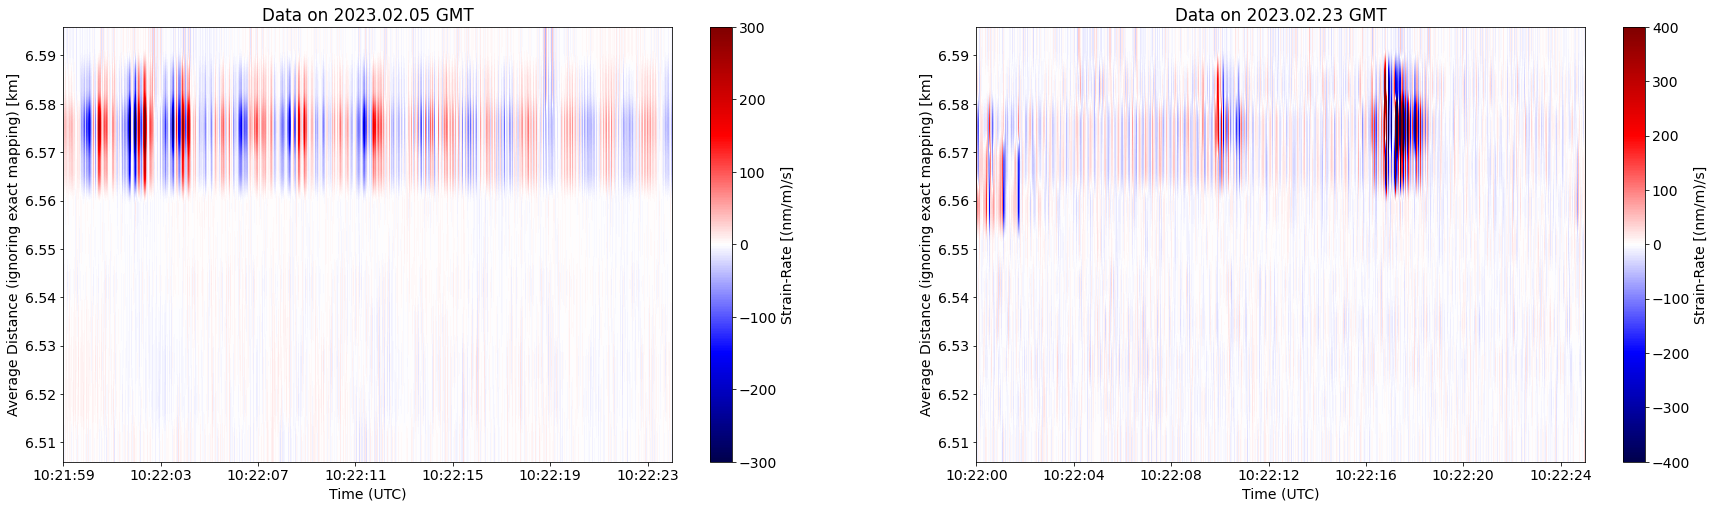

In [8]:
mapping8 = channel_mapping.get_mapping(data_type="clean",chan_spacing=8, d_start=6450, d_end=6600)


t_start = datetime.strptime('2023/02/05 10:22:00.0', '%Y/%m/%d %H:%M:%S.%f') 
t_end   = datetime.strptime('2023/02/05 10:22:25.0', '%Y/%m/%d %H:%M:%S.%f') 
# data8_e2, headers8_e2, axis8_e2 = load_das_h5.load_das_custom(t_start, t_end, input_dir = input_dir,  verbose=False, convert=True)
data8_e2, headers8_e2, axis8_e2 = load_das_h5.load_das_custom(t_start, t_end, input_dir = input_dir, mapchan = mapping8['i0'],  verbose=False, convert=True)
print(np.shape(data8_e2))
print(headers8_e2['d0'])
# print(mapping8['ii'][0:10])

t_start = datetime.strptime('2023/02/23 10:22:00.0', '%Y/%m/%d %H:%M:%S.%f') 
t_end   = datetime.strptime('2023/02/23 10:22:25.0', '%Y/%m/%d %H:%M:%S.%f') 
# data8_e6, headers8_e6, axis8_e6 = load_das_h5.load_das_custom(t_start, t_end, input_dir = input_dir,  verbose=False, convert=True)
data8_e6, headers8_e6, axis8_e6 = load_das_h5.load_das_custom(t_start, t_end, input_dir = input_dir, mapchan = mapping8['i0'],  verbose=False, convert=True)
print(np.shape(data8_e6))
print(headers8_e6['d0'])

#print(mapping8['ii'][0:10])


fig,ax = plt.subplot_mosaic("AB",figsize=(30,8))
ax['A'] = waterfall(data8_e2,headers8_e2,mapping8,ax['A'],vlim=300)
ax['B'] = waterfall(data8_e6,headers8_e6,mapping8,ax['B'],vlim=400)

(3001, 9)
792.3044376373291
(3001, 9)
792.3044414520264


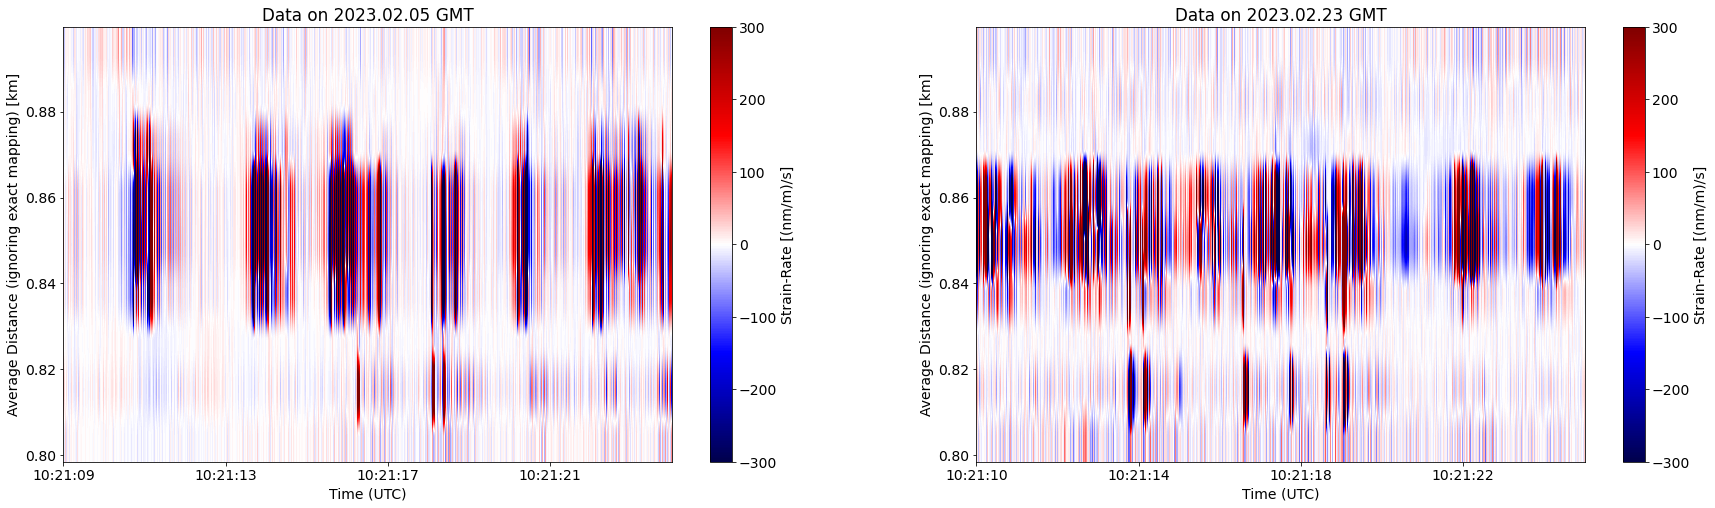

In [11]:
mapping8 = channel_mapping.get_mapping(data_type="clean",chan_spacing=8, d_start=800, d_end=900)


t_start = datetime.strptime('2023/02/05 10:21:10.0', '%Y/%m/%d %H:%M:%S.%f') 
t_end   = datetime.strptime('2023/02/05 10:21:25.0', '%Y/%m/%d %H:%M:%S.%f') 
# data8_e2, headers8_e2, axis8_e2 = load_das_h5.load_das_custom(t_start, t_end, input_dir = input_dir,  verbose=False, convert=True)
data8_e2, headers8_e2, axis8_e2 = load_das_h5.load_das_custom(t_start, t_end, input_dir = input_dir, mapchan = mapping8['i0'],  verbose=False, convert=True)
print(np.shape(data8_e2))
print(headers8_e2['d0'])
# print(mapping8['ii'][0:10])

t_start = datetime.strptime('2023/02/23 10:21:10.0', '%Y/%m/%d %H:%M:%S.%f') 
t_end   = datetime.strptime('2023/02/23 10:21:25.0', '%Y/%m/%d %H:%M:%S.%f') 
# data8_e6, headers8_e6, axis8_e6 = load_das_h5.load_das_custom(t_start, t_end, input_dir = input_dir,  verbose=False, convert=True)
data8_e6, headers8_e6, axis8_e6 = load_das_h5.load_das_custom(t_start, t_end, input_dir = input_dir, mapchan = mapping8['i0'],  verbose=False, convert=True)
print(np.shape(data8_e6))
print(headers8_e6['d0'])

#print(mapping8['ii'][0:10])


fig,ax = plt.subplot_mosaic("AB",figsize=(30,8))
ax['A'] = waterfall(data8_e2,headers8_e2,mapping8,ax['A'],vlim=300)
ax['B'] = waterfall(data8_e6,headers8_e6,mapping8,ax['B'],vlim=300)